c:\Users\Пользователь\Desktop\ml_project\venv\Lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


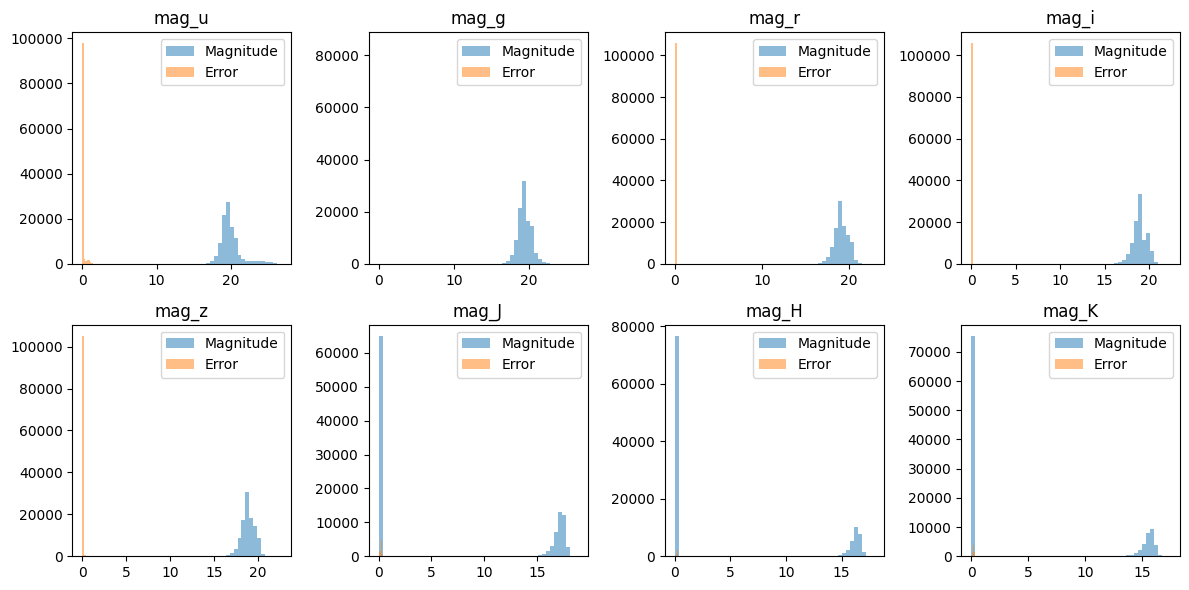

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

from astroML import datasets
from astroML.plotting import hist
from matplotlib import pyplot as plt
from scipy import stats

fetch_data = datasets.fetch_dr7_quasar("../data")
quasar_data = np.load("../data/dr7_quasar.npy")

quasar_data = pd.DataFrame(quasar_data)
# print(quasar_data.describe(include='all'))

fig, axs = plt.subplots(2, 4, figsize=(12, 6))

columns = ['mag_u', 'mag_g', 'mag_r', 'mag_i', 'mag_z', 'mag_J', 'mag_H', 'mag_K']
errors = ['err_u', 'err_g', 'err_r', 'err_i', 'err_z', 'err_J', 'err_H', 'err_K']

for i in range(len(columns)):
    ax = axs[i // 4, i % 4]
    ax.hist(quasar_data[columns[i]], bins=50, alpha=0.5, label='Magnitude')
    ax.hist(quasar_data[errors[i]], bins=50, alpha=0.5, label='Error')
    ax.set_title(columns[i])
    ax.legend()

plt.tight_layout()
plt.show()


| Variable name        | Type           | Description                                                                                 | Values                   |
|----------------------|----------------|---------------------------------------------------------------------------------------------|--------------------------|
| sdssID               | Categorical    | The identifier of the quasar in the SDSS                                                    | Strings of length 14     |
| RA                   | Numerical      | The right ascension of the quasar in degrees                                                | 0.027228-359.997675      |
| dec                  | Numerical      | The declination of the quasar in degrees                                                    | -17.520442-84.431413     |
| redshift             | Numerical      | The redshift of the quasar                                                                  | 0.064500-5.460800        |
| mag_u & err_u        | Numerical      | The magnitude and its error, measured in the u (ultraviolet) filter of the SDSS             | 0.000000-26.778999       |
| mag_g & err_g        | Numerical      | The magnitude and its error, measured in the g (green) filter of the SDSS                   | 0.000000-26.420000       |
| mag_r & err_r        | Numerical      | The magnitude and its error, measured in the r (red) filter of the SDSS                     | 0.000000-22.879000       |
| mag_i & err_i        | Numerical      | The magnitude and its error, measured in the i (infrared) filter of the SDSS                | 0.000000-17.465000       |
| mag_z & err_z        | Numerical      | The magnitude and its error, measured in the z (long-wavelength region) filter of the SDSS  | 0.000000-8.373411e+17    |
| mag_J & err_J        | Numerical      | The magnitude and its error, measured in the J (infrared) filter of the 2MASS system        | 0.000000-18.802000       |
| mag_H & err_H        | Numerical      | The magnitude and its error, measured in the H (infrared) filter of the 2MASS system        | 0.000000-17.886999       |
| mag_K & err_K        | Numerical      | The magnitude and its error, measured in the K (infrared) filter of the 2MASS system        | 0.000000-17.465000       |
| specobjid            | Numerical      | The spectral object identifier in the SDSS database                                         | 7.509409e+16-8.373411e+17|


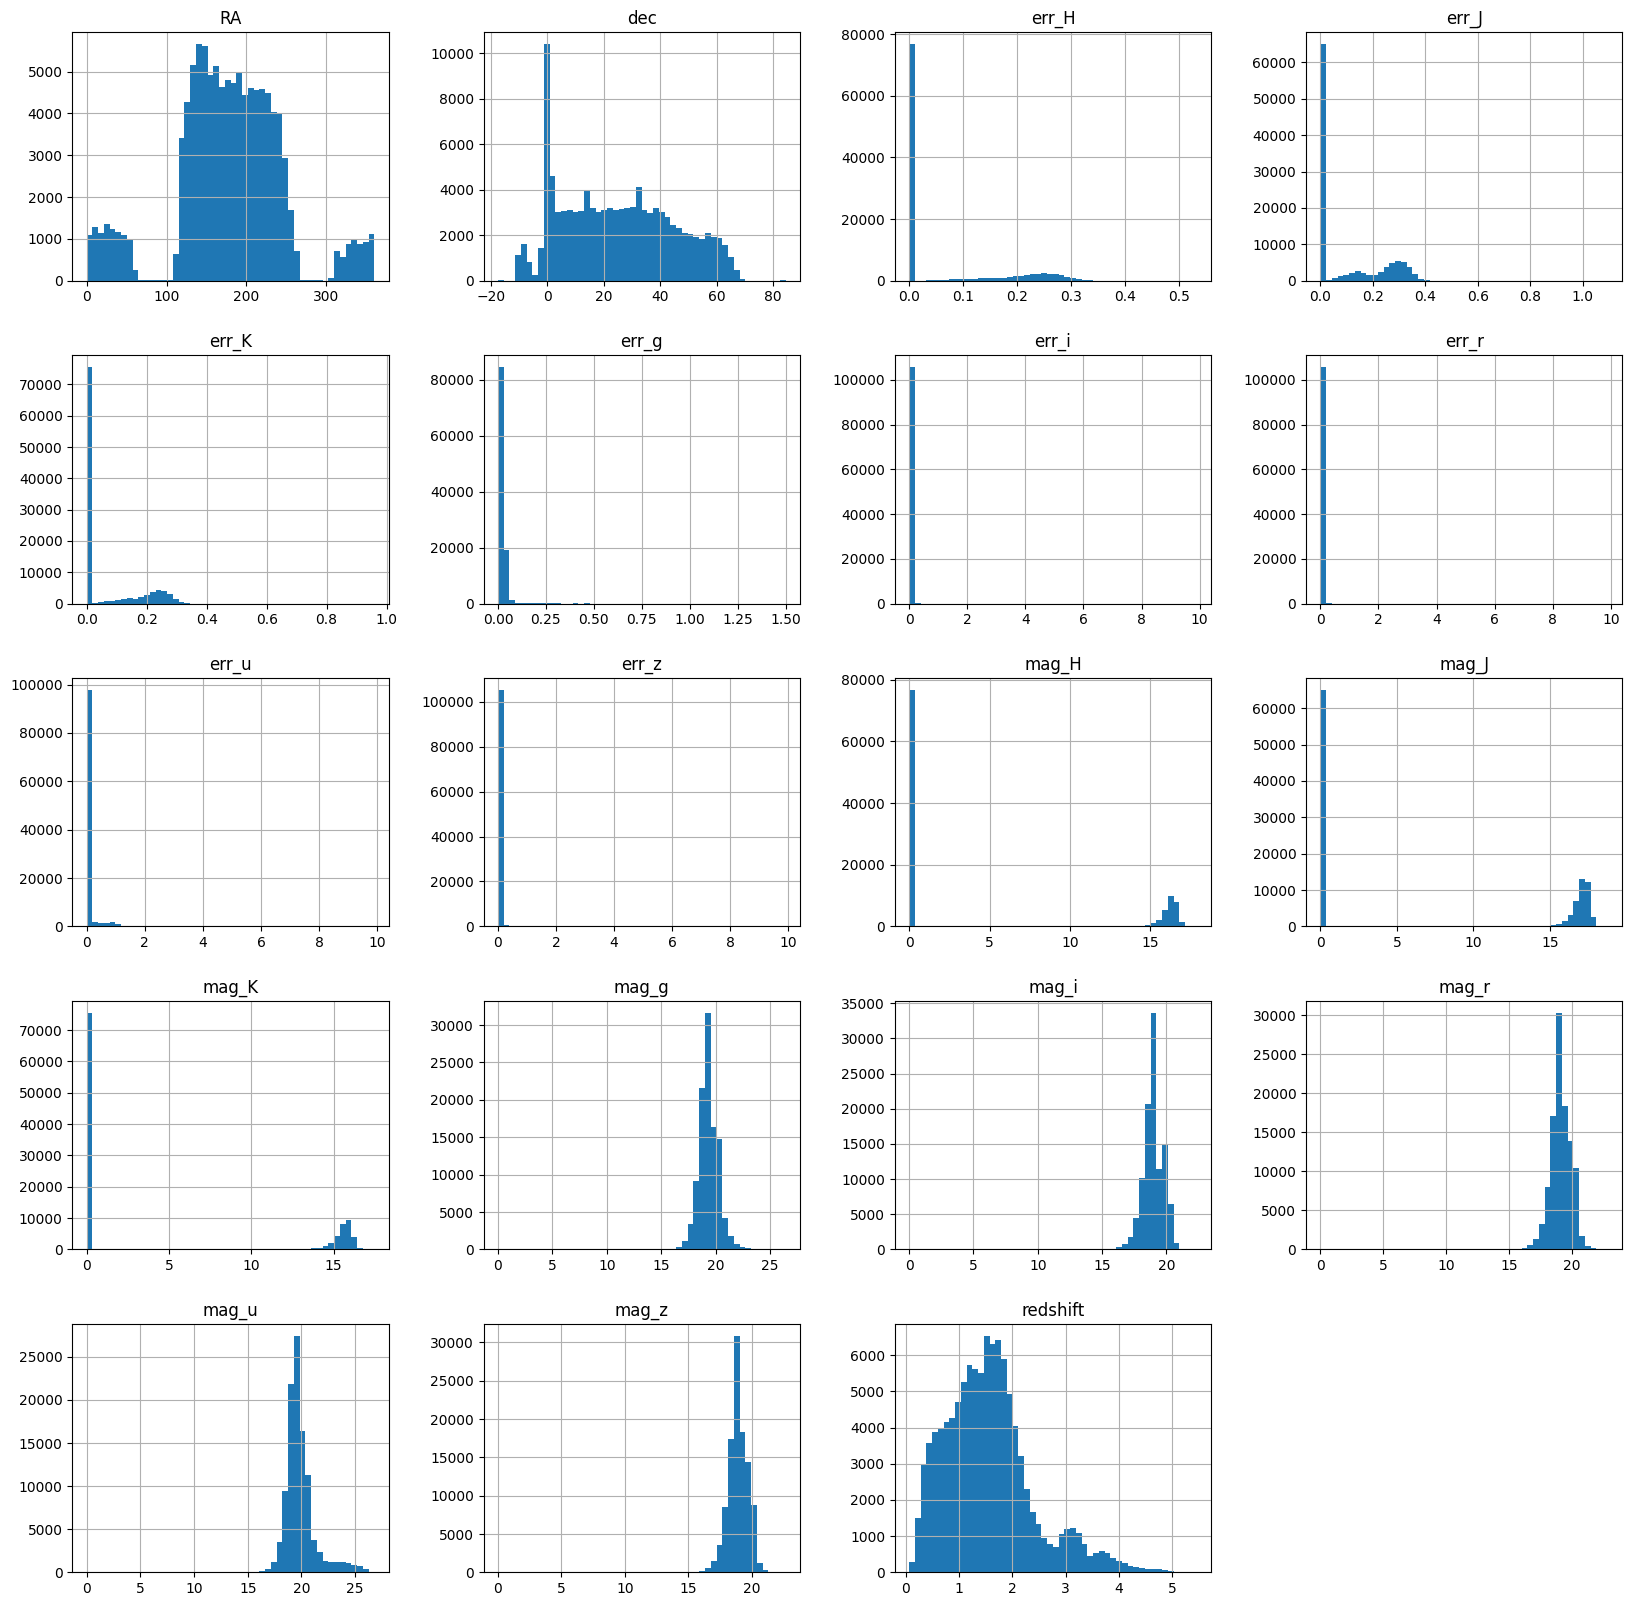

In [5]:
features = list(set(quasar_data.columns) - set(['DateTime', 'sdssID', 'specobjid']))
features.sort()

_ = quasar_data[features].hist(figsize=(20,20), bins=50)

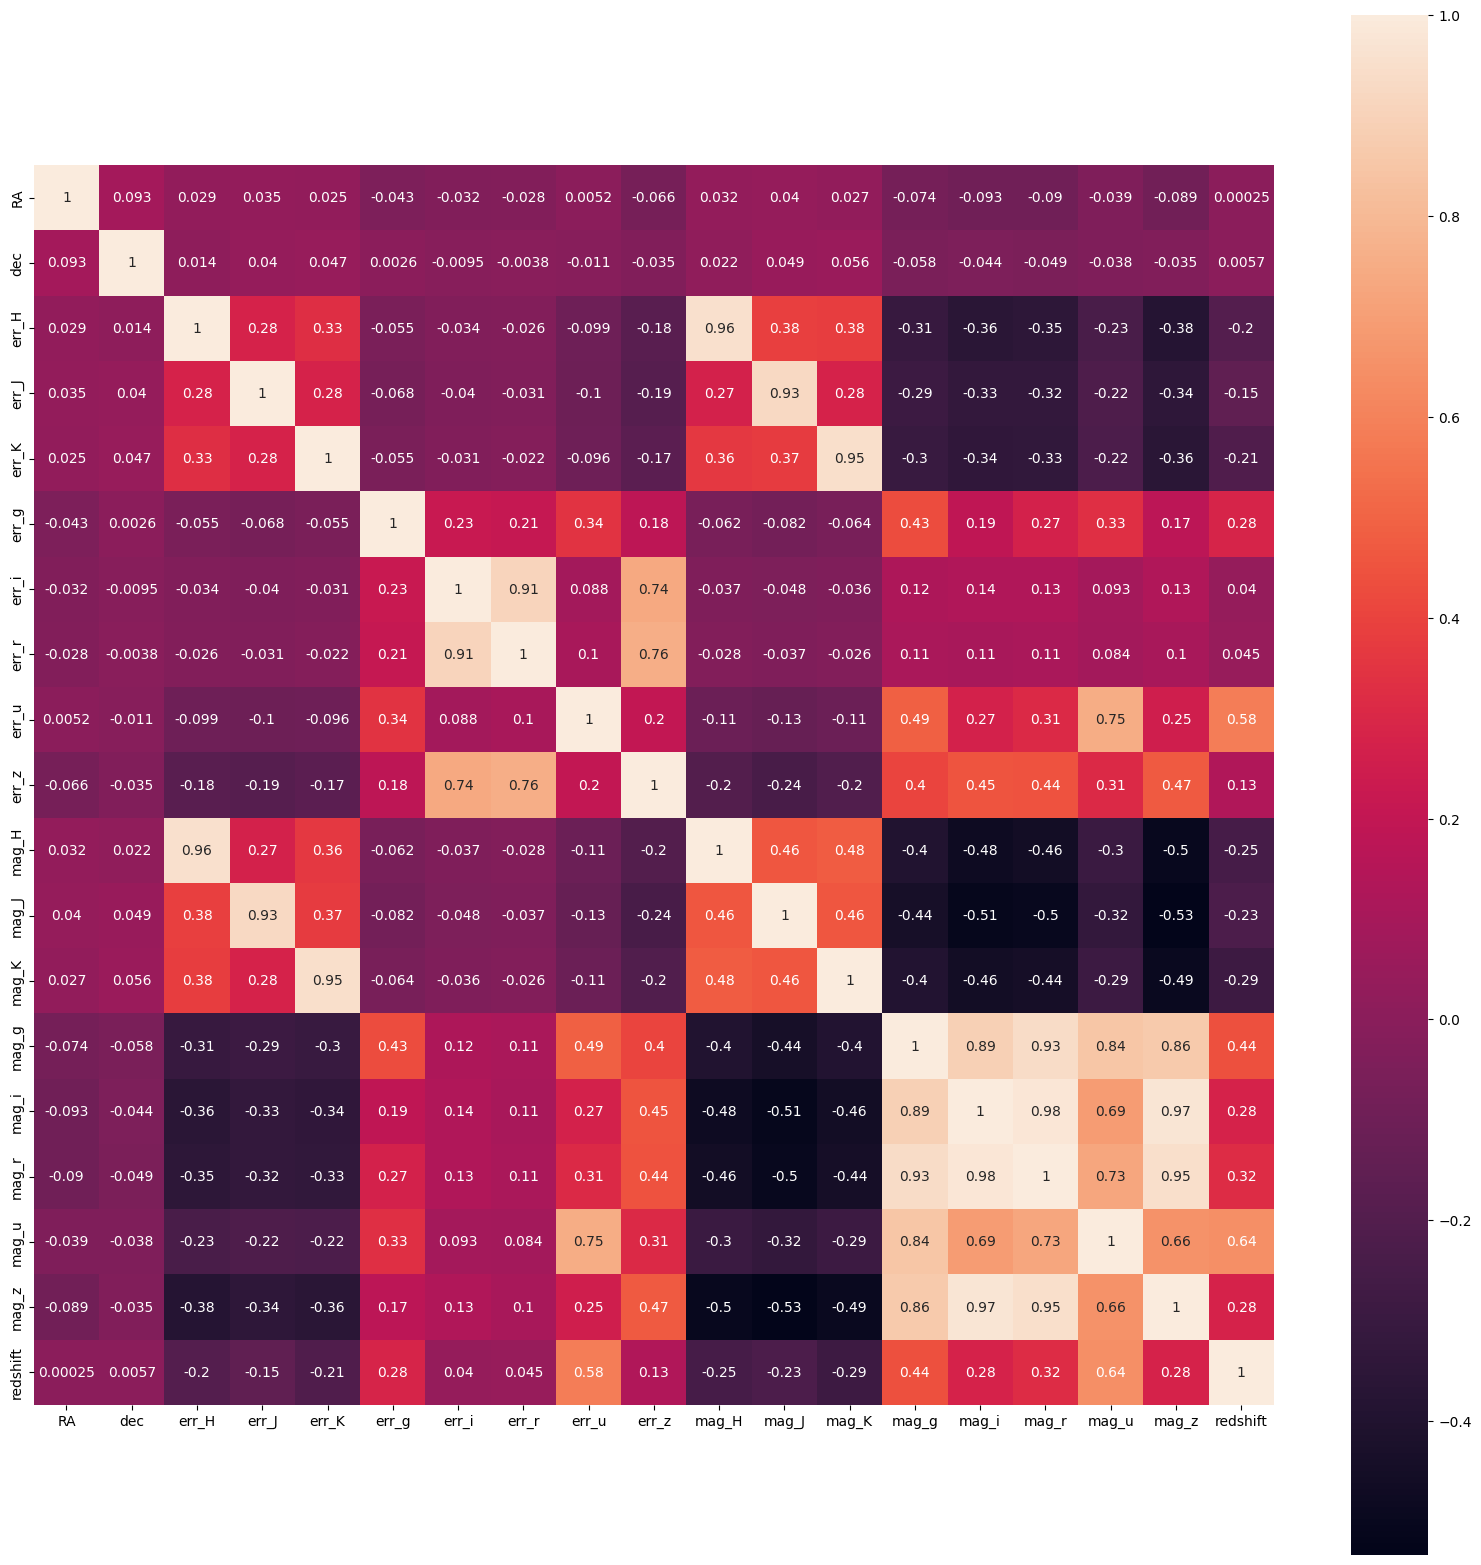

In [6]:
plt.rcParams['figure.figsize']=(20,20)

corr = quasar_data[features].corr()
g = sns.heatmap(corr, square = True, annot=True)